In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import KFold, cross_val_score, cross_validate

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
import os
print(os.listdir('./gdrive/MyDrive/phaneendra_sir_course/Breast_Cancer_Detection/data/'))

['data.csv']


# Data loading 

In [4]:
data_path='./gdrive/MyDrive/phaneendra_sir_course/Breast_Cancer_Detection/data/'
data = pd.read_csv(data_path+'/data.csv')


In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
y = data.diagnosis
x = data.drop(['Unnamed: 32','id','diagnosis'], axis=1)

In [7]:
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
le = LabelEncoder()
le.fit(y)
y = le.transform(y)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [10]:
std = StandardScaler()
x_std = std.fit(x_train)

In [11]:
x_train = x_std.transform(x_train)
x_test = x_std.transform(x_test)

# K-Nearest Neighbor(KNN) Classifier

In [12]:
k_folds = KFold(n_splits = 5)

In [13]:
clf = KNeighborsClassifier()
scores = cross_validate(clf, x_train, y_train, cv=k_folds, scoring=['accuracy', 'precision', 'recall', 'f1'])
# print("Cross Validation Scores: ", scores)
# print("Average CV Score: ", scores.mean())
# print("Number of CV Scores used in Average: ", len(scores))

In [14]:
scores

{'fit_time': array([0.00139451, 0.00151396, 0.00076675, 0.00094938, 0.01255918]),
 'score_time': array([0.37627506, 0.18991399, 0.04542899, 0.03926182, 0.1948185 ]),
 'test_accuracy': array([0.95      , 0.9625    , 0.975     , 0.93670886, 0.93670886]),
 'test_precision': array([0.92      , 0.96296296, 0.96774194, 1.        , 0.96      ]),
 'test_recall': array([0.92      , 0.92857143, 0.96774194, 0.86486486, 0.85714286]),
 'test_f1': array([0.92      , 0.94545455, 0.96774194, 0.92753623, 0.90566038])}

# Supprt Vector Machine(SVM) Classifier

In [15]:
clf = SVC(gamma='auto')
# clf = LogisticRegression()
clf.fit(x_train, y_train)
ac = accuracy_score(y_test,clf.predict(x_test))
print('Accuracy is: ',ac)

Accuracy is:  0.9766081871345029


# Principal Component Analysis(PCA) for clustering

In [16]:
pca = PCA(n_components=2)
pca.fit(x_train)
print(pca.explained_variance_ratio_)
x_train_pca = pca.transform(x_train)

[0.4316748  0.19845652]


#Guassina Mixture Models (GMM)

In [17]:
# adapted from http://www.nhsilbert.net/source/2014/06/bivariate-normal-ellipse-plotting-in-python/
# and https://github.com/joferkington/oost_paper_code/blob/master/error_ellipse.py
def plot_cov_ellipse(cov, pos, nstd=2, ax=None, fc='none', ec=[0,0,0], a=1, lw=2):
    """
    Plots an `nstd` sigma error ellipse based on the specified covariance
    matrix (`cov`). Additional keyword arguments are passed on to the 
    ellipse patch artist.

    Parameters
    ----------
        cov : The 2x2 covariance matrix to base the ellipse on
        pos : The location of the center of the ellipse. Expects a 2-element
            sequence of [x0, y0].
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.

    Returns
    -------
        A matplotlib ellipse artist
    """
    from scipy.stats import chi2
    from matplotlib.patches import Ellipse
    
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    
    kwrg = {'facecolor':fc, 'edgecolor':ec, 'alpha':a, 'linewidth':lw}

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwrg)

    ax.add_artist(ellip)
    return ellip

In [18]:
def plot_gmm(data, gmm):
    #plot scatter-plot with linewidth (lw)=0
    plt.scatter(data[:,0], data[:,1], lw=0)
    plt.xlabel('Principal component-1')    
    plt.ylabel('Principal component-2')    

    #the number of Gaussian mixtures
    k =  gmm.weights_.shape[0]  
    for c in range(0,k):   
        #plot ellipse for each k with mean and covariance matrix
        plot_cov_ellipse(gmm.covariances_[c], gmm.means_[c]) 

In [19]:
gmix = GaussianMixture(n_components=2, covariance_type='full')

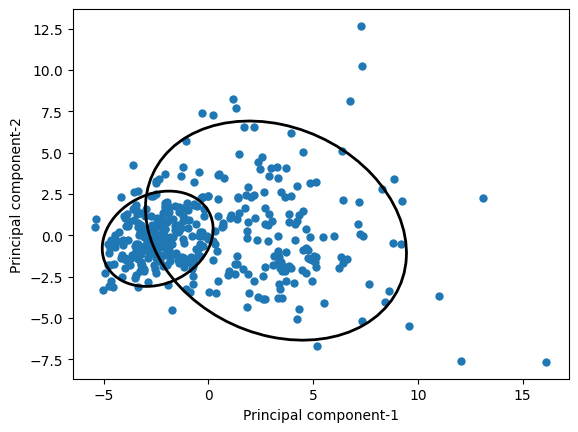

In [20]:
gmix.fit(x_train_pca)
plot_gmm(x_train_pca, gmix)

# SVM Classification by using first 2 principle components

In [21]:
pca = PCA(n_components=2)
pca.fit(x_train)
print(pca.explained_variance_ratio_)
x_train_pca = pca.transform(x_train)
clf = SVC(gamma='auto')
clf.fit(x_train_pca, y_train)
ac = accuracy_score(y_test,clf.predict(pca.transform(x_test)))
print('Accuracy is: ',ac)

[0.4316748  0.19845652]
Accuracy is:  0.9532163742690059


The first two principal components has been used. The accuracy of $95.32$% achieved. 

In [22]:
# graph of train percentage vs test accuracy

# Number of Training samples vs Test accuracy

In [23]:
train_sizes = []
test_accuracies = []

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

std = StandardScaler()
x_std = std.fit(x_train)
x_train = x_std.transform(x_train)
x_test = x_std.transform(x_test)

for train_size in range(10, 410, 10):
    # print('len(x)', len(x))
    # x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1-(train_ratio/100), random_state=42)
    x_train_1 = x_train[:train_size]
    y_train_1 = y_train[:train_size]
    
    clf = SVC(gamma='auto')
    clf.fit(x_train_1, y_train_1)
    ac = accuracy_score(y_test,clf.predict(x_test))
    print('Train size:', train_size)
    print('Test accuracy:', ac)
    print('')
    train_sizes.append(train_size)
    test_accuracies.append(ac)

Train size: 10
Test accuracy: 0.631578947368421

Train size: 20
Test accuracy: 0.9005847953216374

Train size: 30
Test accuracy: 0.935672514619883

Train size: 40
Test accuracy: 0.9298245614035088

Train size: 50
Test accuracy: 0.9590643274853801

Train size: 60
Test accuracy: 0.9415204678362573

Train size: 70
Test accuracy: 0.9415204678362573

Train size: 80
Test accuracy: 0.9532163742690059

Train size: 90
Test accuracy: 0.9590643274853801

Train size: 100
Test accuracy: 0.9590643274853801

Train size: 110
Test accuracy: 0.9532163742690059

Train size: 120
Test accuracy: 0.9532163742690059

Train size: 130
Test accuracy: 0.9532163742690059

Train size: 140
Test accuracy: 0.9532163742690059

Train size: 150
Test accuracy: 0.9532163742690059

Train size: 160
Test accuracy: 0.9532163742690059

Train size: 170
Test accuracy: 0.9590643274853801

Train size: 180
Test accuracy: 0.9590643274853801

Train size: 190
Test accuracy: 0.9649122807017544

Train size: 200
Test accuracy: 0.970760233

Text(0, 0.5, 'classification accuracy')

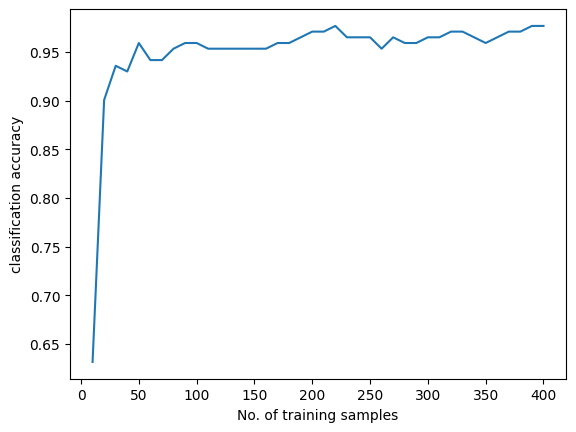

In [24]:
plt.plot(train_sizes, test_accuracies)
plt.xlabel('No. of training samples')
plt.ylabel('classification accuracy')